In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [2]:
function = lambda w: w ** 2 - 4 * w
derivative = lambda w: 2 * w - 4

In [21]:
w = np.arange(-10, 14, 0.5)
loss = function(w)
w_0 = -8

tangent_line = lambda w:(derivative(w_0) * (w-w_0) + function(w_0))
tangent_line_values = tangent_line(w)

In [6]:
73/5

14.6

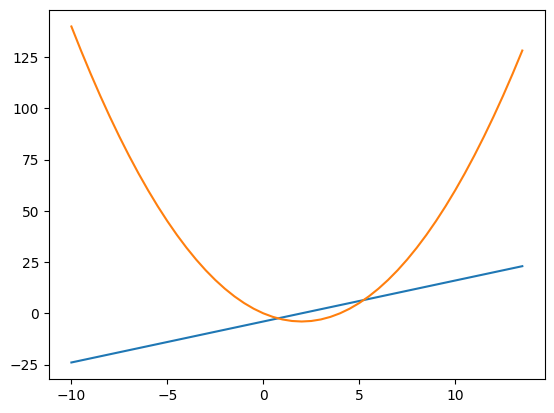

In [22]:
plt.plot(w, derivative(w))
plt.plot(w, function(w))

In [25]:

df = pd.DataFrame({'w': w, 'loss': loss,'tangent_line': tangent_line_values})
df.head(30)

,w,loss,tangent_line
0,-10.0,140.00,136.0
1,-9.5,128.25,126.0
2,-9.0,117.00,116.0
3,-8.5,106.25,106.0
4,-8.0,96.00,96.0
5,-7.5,86.25,86.0
6,-7.0,77.00,76.0
7,-6.5,68.25,66.0
8,-6.0,60.00,56.0
9,-5.5,52.25,46.0


In [17]:

fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=df['w'][:100], y=df['tangent_line'][:100], name='tangent line'),
                      go.Scatter(x=[w_0], y=[function(w_0)], marker_size=10, name='point')],
                layout=go.Layout(width=800, title='Loss Function'))
fig.show()

In [20]:
-160+96

-64

In [39]:

max_iters = 10000
iters = 0
w_0 = -4
previous_step_size = 1
learning_rate = 0.01
precision = 0.000001
derivative = lambda w: 2 * w - 4
points = []

while previous_step_size > precision and iters < max_iters:
    w_prev = w_0
    w_0 = w_0 - learning_rate * derivative(w_prev)
    previous_step_size = abs(w_0 - w_prev)
    iters += 1
    points.append(w_0)
    print(f'Iteracja # {iters}: obecny punkt: {w_0}')

print(f'Minimum lokalne w punkcie: {w_0}')

Iteracja # 1: obecny punkt: -3.88
Iteracja # 2: obecny punkt: -3.7624
Iteracja # 3: obecny punkt: -3.647152
Iteracja # 4: obecny punkt: -3.53420896
Iteracja # 5: obecny punkt: -3.4235247808
Iteracja # 6: obecny punkt: -3.315054285184
Iteracja # 7: obecny punkt: -3.20875319948032
Iteracja # 8: obecny punkt: -3.104578135490714
Iteracja # 9: obecny punkt: -3.0024865727808994
Iteracja # 10: obecny punkt: -2.9024368413252812
Iteracja # 11: obecny punkt: -2.8043881044987757
Iteracja # 12: obecny punkt: -2.7083003424088004
Iteracja # 13: obecny punkt: -2.614134335560624
Iteracja # 14: obecny punkt: -2.521851648849412
Iteracja # 15: obecny punkt: -2.4314146158724235
Iteracja # 16: obecny punkt: -2.342786323554975
Iteracja # 17: obecny punkt: -2.2559305970838754
Iteracja # 18: obecny punkt: -2.170811985142198
Iteracja # 19: obecny punkt: -2.087395745439354
Iteracja # 20: obecny punkt: -2.005647830530567
Iteracja # 21: obecny punkt: -1.9255348739199558
Iteracja # 22: obecny punkt: -1.84702417644

In [40]:
points = pd.DataFrame({'point': points})
# points = points.reset_index()
points['value'] = function(points['point'])
points.head()

,point,value
0,-3.880000,30.574400
1,-3.762400,29.205254
2,-3.647152,27.890326
3,-3.534209,26.627469
4,-3.423525,25.414621


In [41]:
fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=points['point'], y=points['value'], marker_size=5, name='point', mode='markers')],
                layout=go.Layout(width=1000, title='Loss Function'))
fig.show()


In [43]:
def gradient_descent(derivative_func, learning_rate=0.01, max_iters=10000,
                     precision=0.000001, w_0=-8, verbose=True):
    iters = 0
    previous_step_size = 1
    points = []

    while previous_step_size > precision and iters < max_iters:
        w_prev = w_0
        w_0 = w_0 - learning_rate * derivative_func(w_prev)
        previous_step_size = abs(w_0 - w_prev)
        iters += 1
        points.append(w_0)
        if verbose:
            print(f'Iteracja # {iters}: obecny punkt: {w_0}')


    print(f'Minimum lokalne w punkcie: {w_0}')
    return points

points = gradient_descent(derivative)

def test_lr(func, derivative_func, learning_rate, w_0=-8):
    points = gradient_descent(derivative_func, learning_rate=learning_rate, w_0=w_0, verbose=False)
    points = pd.DataFrame({'point': points})
    points = points.reset_index()
    points['value'] = func(points['point'])

    fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function'),
                      go.Scatter(x=points['point'], y=points['value'], marker_size=5, name='point', mode='markers+lines')],
                layout=go.Layout(width=1000, title=f'Loss Function learning_rate:{learning_rate}'))
    fig.show()

test_lr(function, derivative, 0.01)

Iteracja # 1: obecny punkt: -7.8
Iteracja # 2: obecny punkt: -7.604
Iteracja # 3: obecny punkt: -7.41192
Iteracja # 4: obecny punkt: -7.2236816
Iteracja # 5: obecny punkt: -7.039207968
Iteracja # 6: obecny punkt: -6.8584238086400005
Iteracja # 7: obecny punkt: -6.681255332467201
Iteracja # 8: obecny punkt: -6.507630225817857
Iteracja # 9: obecny punkt: -6.3374776213015
Iteracja # 10: obecny punkt: -6.17072806887547
Iteracja # 11: obecny punkt: -6.007313507497961
Iteracja # 12: obecny punkt: -5.8471672373480015
Iteracja # 13: obecny punkt: -5.6902238926010416
Iteracja # 14: obecny punkt: -5.53641941474902
Iteracja # 15: obecny punkt: -5.38569102645404
Iteracja # 16: obecny punkt: -5.23797720592496
Iteracja # 17: obecny punkt: -5.09321766180646
Iteracja # 18: obecny punkt: -4.951353308570331
Iteracja # 19: obecny punkt: -4.812326242398925
Iteracja # 20: obecny punkt: -4.676079717550946
Iteracja # 21: obecny punkt: -4.542558123199927
Iteracja # 22: obecny punkt: -4.411706960735929
Iteracj

In [44]:

function_2 = lambda w: (w + 8) * (w - 5) * (w - 10) * (w + 5) * (w + 5) * (w - 2)

from sympy import Symbol, lambdify

w = Symbol('w')
f = (w + 8) * (w - 5) * (w - 10) * (w + 5) * (w + 5) * (w - 2)
f_diff = f.diff(w)

derivative_2 = lambdify(w, f_diff)
del w

In [45]:
w = np.arange(-9, 10, 0.1)
loss = function_2(w)
w_0 = -4

tangent_line = lambda w: derivative_2(w_0) * (w - w_0) + function_2(w_0)
tangent_line_values = tangent_line(w)

df = pd.DataFrame({'w': w, 'loss': loss,'tangent_line': tangent_line_values})
df.head()

fig = go.Figure(data=[go.Scatter(x=df['w'], y=df['loss'], name='function_2'),
                      go.Scatter(x=df['w'][20:80], y=df['tangent_line'][20:80], name='tangent line'),
                      go.Scatter(x=[w_0], y=[function_2(w_0)], marker_size=10, name='point')],
                layout=go.Layout(width=800, title='Loss Function'))
fig.show()